# IXIS Data Assessment - Michelle Kloc, 02/15/2024

I've included this as a .ipynb to include logical steps to aid in the navigation of the analysis code, and also to aid in data exploration and visualization.

### Section 1: Data Assessment

Import necessary packages and load data (I have this saved locally). This is not PIP8 formatted.

In [1]:
import pandas as pd
import numpy as np
import openpyxl
from openpyxl.utils.dataframe import dataframe_to_rows
import matplotlib.pyplot as plt

PATH = '/Users/michelle/Desktop/IXIS/Assessment/'

adds = pd.read_csv(PATH + 'DataAnalyst_Ecom_data_addsToCart.csv')
data = pd.read_csv(PATH + 'DataAnalyst_Ecom_data_sessionCounts.csv')

data.head(n=5)

,dim_browser,dim_deviceCategory,dim_date,sessions,transactions,QTY
0,Safari,tablet,7/1/12,2928,127,221
1,Internet Explorer,desktop,7/1/12,1106,28,0
2,Chrome,tablet,7/1/12,474,3,13
3,Amazon Silk,tablet,7/1/12,235,4,5
4,Internet Explorer,mobile,7/1/12,178,6,11


In [2]:
print(data.dtypes)

dim_browser           object
dim_deviceCategory    object
dim_date              object
sessions               int64
transactions           int64
QTY                    int64
dtype: object


In [3]:
len(data)

7734

First, I'll identify if there are any null values in the data set that may affect the analysis - likely any null entries would need to be removed. The command df.isnull will be used to determine whether any NaNs are present, and will return True if they are.

In [4]:
null_data = data.isnull()
null_data.head(n=5)

,dim_browser,dim_deviceCategory,dim_date,sessions,transactions,QTY
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False


In [5]:
columns_list = null_data.columns.tolist()
print(columns_list)

search_value = True
for i in columns_list:
    occurrences = (null_data[i] == search_value).sum()
    print(f"The value {search_value} occurs {occurrences} times in the column {i}.")
    if occurrences > 0:
        raise ValueError("The dataset contains null values!")

# I was expecting some null values, I prefer to view these values before just dropping them but I included both options below. 
# Because there are no null values I wrote the code below this point to use the original df "data" rather than new "null_data" with dropped null values. 
            
# rows_with_nulls = null_data[null_data.isnull().any(axis=1)]
# rows_with_nulls.to_excel('/Users/michelle/Desktop/IXIS/Assessment/nulls.xlsx') 
# null_data.dropna(inplace=True)

['dim_browser', 'dim_deviceCategory', 'dim_date', 'sessions', 'transactions', 'QTY']
The value True occurs 0 times in the column dim_browser.
The value True occurs 0 times in the column dim_deviceCategory.
The value True occurs 0 times in the column dim_date.
The value True occurs 0 times in the column sessions.
The value True occurs 0 times in the column transactions.
The value True occurs 0 times in the column QTY.


I want to make sure that no entries are duplicated, which would skew any statistical analysis of the data.

In [6]:
search_for_dupes = data.duplicated(keep=False)
search_value = True
occurrences = (search_for_dupes == search_value).sum()
print(f"The value {search_value} occurs {occurrences}.")

duplicated_rows = data[search_for_dupes]
print(duplicated_rows)

#I like to look at duplicates prior to removal unless it is a known dataset, although there are none here I prefer to view these in excel.
# duplicated_rows.to_excel('/Users/michelle/Desktop/IXIS/Assessment/dupes.xlsx')
# data = data.drop_duplicates(keep='first')

The value True occurs 0.
Empty DataFrame
Columns: [dim_browser, dim_deviceCategory, dim_date, sessions, transactions, QTY]
Index: []


Identify unique values within the dataset, clean categories as necessary. 'dim_deviceCategory' only has three categories, and doesn't require any additional manipulation.

In [7]:
print(data['dim_deviceCategory'].unique())

['tablet' 'desktop' 'mobile']


In [8]:
print(data['dim_browser'].unique())

['Safari' 'Internet Explorer' 'Chrome' 'Amazon Silk' 'Android Browser'
 'error' 'Edge' 'Opera' 'UC Browser' 'Puffin' 'SeaMonkey' '(not set)'
 'BlackBerry' 'osee2unifiedRelease' 'Safari (in-app)' 'Android Webview'
 'Samsung Internet' 'Firefox' 'DESKTOP' 'Mozilla Compatible Agent'
 'Apple-iPhone7C2' 'Iron' 'Maxthon' 'Mozilla' 'MRCHROME' 'YelpWebView'
 'Opera Mini' 'Seznam' 'YaBrowser' 'BrowserNG' 'anonymous'
 'DDG-Android-3.0.14' 'FeeddlerPro' 'SonyEricssonK700c' 'TimesTablet'
 'Coc Coc' 'DDG-Android-3.1.1' 'LG-C410' 'Truefitbot' 'NokiaE52-1'
 'Nintendo Browser' 'Amazon.com' 'NetFront' 'IE with Chrome Frame'
 'NokiaC7-00' 'Python-urllib' 'Job Search' 'Playstation 3' 'Nokia Browser'
 'turnaround' 'DDG-Android-3.0.11' 'X-WebBrowser' 'DDG-Android-3.0.17'
 'HubSpot inbound link reporting check' 'NetNewsWire Browser' 'Mobile'
 'Chromeless 1.2.0']


There are some repetitions that can be consolidated, shown in "redundant_names_dict" below. Although some of the browser values are devices, we will list them in the "Unknown" category because there is no way to identify whether or not the device is running the default browser. The devices that are known to have native browsers, such as Nokia and Playstation 3, have been left alone here.

In [9]:
redundant_names_dict = {
    'Opera Mini': 'Opera',
    'IE with Chrome Frame': 'Internet Explorer',
    'Safari (in-app)': 'Safari',
    'Firefox': 'Mozilla Firefox',
    'Mozilla Compatible Agent': 'Mozilla Firefox',
    'Mozilla': 'Mozilla Firefox',
    'Chromeless 1.2.0': 'Chrome',
    'BrowserNG': 'Nokia',
    'NokiaE52-1': 'Nokia',
    'NokiaC7-00': 'Nokia',
    'Nokia Browser': 'Nokia'
}

data['dim_browser'] = data['dim_browser'].replace(redundant_names_dict)
no_browser_info_list = ['Android Browser', 'error', '(not set)', 'osee2unifiedRelease', 'Android Webview', 'Samsung Internet', 'DESKTOP', 'Apple-iPhone7C2', 'anonymous', 'DDG-Android-3.0.14', 'FeeddlerPro', 'SonyEricssonK700c', 'TimesTablet', 'DDG-Android-3.1.1', 'LG-C410','NetFront', 'Python-urllib', 'Job Search', 'turnaround', 'DDG-Android-3.0.11', 'DDG-Android-3.0.17', 'HubSpot inbound link reporting check', 'Mobile'] 
data['dim_browser'] = data['dim_browser'].replace(no_browser_info_list, 'Unknown')

print(data['dim_browser'].unique())

['Safari' 'Internet Explorer' 'Chrome' 'Amazon Silk' 'Unknown' 'Edge'
 'Opera' 'UC Browser' 'Puffin' 'SeaMonkey' 'BlackBerry' 'Mozilla Firefox'
 'Iron' 'Maxthon' 'MRCHROME' 'YelpWebView' 'Seznam' 'YaBrowser' 'Nokia'
 'Coc Coc' 'Truefitbot' 'Nintendo Browser' 'Amazon.com' 'Playstation 3'
 'X-WebBrowser' 'NetNewsWire Browser']


The 'dim_date' column is currently a list of objects, these should really be in datetime if we want to programmatically work with this data. It will also need to be set as the index to calculate data by month.  

In [10]:
data['dim_date'] = pd.to_datetime(data['dim_date'], format='%m/%d/%y')
print(data.dtypes)
data = data.set_index('dim_date')
data = data.sort_index()

dim_browser                   object
dim_deviceCategory            object
dim_date              datetime64[ns]
sessions                       int64
transactions                   int64
QTY                            int64
dtype: object


I've observed that there are some instances where the quantity metric is lower than the number of transactions. For an online retailer website, if a customer is purchasing a minimum of 1 item per transaction, the quantity metric should always be higher than the transaction metric.

In [11]:
qty_low = data['QTY'] < data['transactions']
count = qty_low.sum()

print(f"Number of rows where column2 > column1: {count}")

data_qtylow = data[qty_low]
# data_qtyfiltered.to_excel('/Users/michelle/Desktop/IXIS/Assessment/Data_lowqty.xlsx')

Number of rows where column2 > column1: 580


I took a look at these transactions, there's nothing visually about the data entries that stands out to me as erroneous. This result could arise from a number of things (incomplete transactions, items that were sold but later returned, report generation error, my error in understanding the underlying features of the metrics reported, tracking errors, etc.). In a real world situation, my first action would be to communicate with the company regarding the reports that were generated. 580 entries accounts for approximately 7% of the total dataset, which could be a reasonable error percentage, but to me it seems high. For the purposes of this exercise, I am going to omit these entries from the overall analysis in lieu of further information.

In [12]:
data_qtycorrect = data[~qty_low]
len(data_qtycorrect)

7154

The "Adds to cart" dataset is much smaller and less complex, I looked at this csv file prior to uploading it and it passed a visual inspection for repeated entries and lack of null values, and the data types are all integers. All this really needs is a datetime index conversion, although this isn't absolutely necessary for the scope of this analysis I do like to include it.

In [13]:
adds.head(n=3)

,dim_year,dim_month,addsToCart
0,2012,7,191504
1,2012,8,217666
2,2012,9,123726


In [14]:
print(adds.dtypes)

dim_year      int64
dim_month     int64
addsToCart    int64
dtype: object


In [15]:
adds['date'] = pd.to_datetime(dict(year=adds['dim_year'], month=adds['dim_month'], day=1))
adds = adds.set_index('date')

adds.drop(['dim_year', 'dim_month'], axis=1, inplace=True)
adds = adds.sort_index()

adds.head(n=5)

,addsToCart
date,
2012-07-01,191504
2012-08-01,217666
2012-09-01,123726
2012-10-01,139803
2012-11-01,186572


### Section 2: Data Analysis

Before calculating descriptive statistics on the dataset, I first need to calculate ECR and UPT (units per transaction) values.

In [16]:
data_qtycorrect['ECR'] = data_qtycorrect['transactions'] / data_qtycorrect['sessions']
data_qtycorrect['ECR'].replace([np.inf, -np.inf], np.nan, inplace=True)
data_qtycorrect.head(n=5)

/var/folders/g6/_ng9_cnj7t34tpcl5sz17jch0000gr/T/ipykernel_29984/2797542436.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_qtycorrect['ECR'] = data_qtycorrect['transactions'] / data_qtycorrect['sessions']
/var/folders/g6/_ng9_cnj7t34tpcl5sz17jch0000gr/T/ipykernel_29984/2797542436.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_qtycorrect['ECR'].replace([np.inf, -np.inf], np.nan, inplace=True)


,dim_browser,dim_deviceCategory,sessions,transactions,QTY,ECR
dim_date,,,,,,
2012-07-01,Safari,tablet,2928,127,221,0.043374
2012-07-01,Chrome,tablet,474,3,13,0.006329
2012-07-01,Amazon Silk,tablet,235,4,5,0.017021
2012-07-01,Internet Explorer,mobile,178,6,11,0.033708
2012-07-01,Unknown,mobile,10,0,0,0.000000


I'm going to add a column containing the session counts normalized to the maximum (simple normalization). 

In [17]:
sessions_max = data_qtycorrect['sessions'].max()
sessions_max
data_qtycorrect['Norm_sessions'] = data_qtycorrect['sessions'] / sessions_max
data_qtycorrect.head(n=5)

/var/folders/g6/_ng9_cnj7t34tpcl5sz17jch0000gr/T/ipykernel_29984/3504563516.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_qtycorrect['Norm_sessions'] = data_qtycorrect['sessions'] / sessions_max


,dim_browser,dim_deviceCategory,sessions,transactions,QTY,ECR,Norm_sessions
dim_date,,,,,,,
2012-07-01,Safari,tablet,2928,127,221,0.043374,0.067219
2012-07-01,Chrome,tablet,474,3,13,0.006329,0.010882
2012-07-01,Amazon Silk,tablet,235,4,5,0.017021,0.005395
2012-07-01,Internet Explorer,mobile,178,6,11,0.033708,0.004086
2012-07-01,Unknown,mobile,10,0,0,0.000000,0.000230


I split these into individual data frames to avoid needing to convert the categorical values for Device Categories into numerical values. Because there are only 3 unique values this is a reasonable strategy to make the output results more easily readable; however this is not always a reasonable option to undertake.

In [18]:
tablet = data_qtycorrect[data_qtycorrect['dim_deviceCategory'] == 'tablet']
desktop = data_qtycorrect[data_qtycorrect['dim_deviceCategory'] == 'desktop']
mobile = data_qtycorrect[data_qtycorrect['dim_deviceCategory'] == 'mobile']

To compare descriptive statistics, I decided to use describe() rather than manually select and write individual metrics, as I feel as though this is a more complete and easy to read output. This is then added to separate excel spreadsheets.

In [19]:
devices_list = [tablet, desktop, mobile]
devices_names = ['tablet', 'desktop', 'mobile']

# First sheet, aggregating month * device descriptive statistics
excel_writer = pd.ExcelWriter(PATH + 'IXIS_OutputData.xlsx', engine='openpyxl')
sheet_name = 'Device Data Summary'
sheet_name2 = 'Month Over Month Analysis'

for device_df, device_name in zip(devices_list, devices_names):
    # Descriptive statistics
    monthly_dstat = device_df.groupby([device_df.index.year, device_df.index.month]).describe()
    quarterly_dstat = device_df.groupby([device_df.index.year, device_df.index.quarter]).describe()
    
    # Add to excel sheet 1
    pd.DataFrame([f"{device_name} Monthly Descriptive Statistics"]).to_excel(excel_writer, sheet_name=sheet_name, startrow=excel_writer.sheets[sheet_name].max_row if sheet_name in excel_writer.sheets else 0, index=False, header=False)
    startrow = excel_writer.sheets[sheet_name].max_row + 1 if sheet_name in excel_writer.sheets else 0
    
    monthly_dstat.to_excel(excel_writer, sheet_name=sheet_name, startrow=startrow, startcol=0)
    startrow = excel_writer.sheets[sheet_name].max_row + 2
    
    pd.DataFrame([f"{device_name} Quarterly Descriptive Statistics"]).to_excel(excel_writer, sheet_name=sheet_name, startrow=startrow, index=False, header=False)
    
    startrow += 1  
    quarterly_dstat.to_excel(excel_writer, sheet_name=sheet_name, startrow=startrow, startcol=0)
    startrow += quarterly_dstat.shape[0] + 3  # Additional space before the next device's data

# Second sheet containing month over month analysis
sheet_name2 = 'Month Over Month Analysis'

for device_df, device_name in zip(devices_list, devices_names):
    last_month_end = device_df.index.max()
    last_month_start = last_month_end.replace(day=1)
    prior_month_end = (last_month_start - pd.Timedelta(days=1))
    prior_month_start = prior_month_end.replace(day=1)
    
    last_month_data = device_df.loc[last_month_start:last_month_end]
    prior_month_data = device_df.loc[prior_month_start:prior_month_end]
    
    # Descriptive statistics
    prior_month_stats = prior_month_data.describe()
    last_month_stats = last_month_data.describe()

    #Excel spreadhsheet formatting
    startrow = excel_writer.sheets[sheet_name2].max_row + 1 if sheet_name2 in excel_writer.sheets else 0
    
    pd.DataFrame([f"{device_name} Month Over Month"]).to_excel(excel_writer, sheet_name=sheet_name2, startrow=startrow, index=False, header=False)
    startrow += 1
    
    pd.DataFrame([["", "Month 11 Stats", "", "", "", "", "", "", "Month 12 Stats"]]).to_excel(excel_writer, sheet_name=sheet_name2, startrow=startrow, startcol=0, index=False, header=False)
    startrow += 1  
    
    # Month over month descriptions are easier to read if they are side by side
    prior_month_col_offset = 0
    last_month_col_offset = prior_month_stats.shape[1] + 2
    
    prior_month_stats.to_excel(excel_writer, sheet_name=sheet_name2, startrow=startrow, startcol=prior_month_col_offset, header=True, index=True)
    last_month_stats.to_excel(excel_writer, sheet_name=sheet_name2, startrow=startrow, startcol=last_month_col_offset, header=True, index=True)
    
    max_rows = max(last_month_stats.shape[0], prior_month_stats.shape[0])
    startrow += prior_month_stats.shape[0] + 2
    
    # Absolute and relative differences
    absolute = last_month_stats - prior_month_stats
    relative = (last_month_stats - prior_month_stats) / prior_month_stats

    # Add to sheet
    pd.DataFrame([f"Absolute Difference"]).to_excel(excel_writer, sheet_name=sheet_name2, startrow=startrow, index=False, header=False)
    startrow += 1
    absolute.to_excel(excel_writer, sheet_name=sheet_name2, startrow=startrow, startcol=0, header=True, index=True)
    startrow += absolute.shape[0] + 2

    pd.DataFrame([f"Relative Difference"]).to_excel(excel_writer, sheet_name=sheet_name2, startrow=startrow, index=False, header=False)
    startrow += 1
    relative.to_excel(excel_writer, sheet_name=sheet_name2, startrow=startrow, startcol=0, header=True, index=True)
    startrow += relative.shape[0] + 2

# Still need to include 'Adds to Cart' on the second sheet
last_2_months = adds.tail(2)
months = ['Month 11', 'Month 12']
last_2_months['Months'] = months

# I'm hard coding the spreadsheet locations in this formatting scheme to save time
pd.DataFrame(["Adds To Cart Month Over Month"]).to_excel(excel_writer, sheet_name=sheet_name2, startrow=0, startcol=14, index=False, header=False)
last_2_months.to_excel(excel_writer, sheet_name=sheet_name2, startrow=1, startcol=14, header=True, index=True)
    
# Absolute and relative differences
int_cols = last_2_months.select_dtypes(include=[np.number]) # Need integer columns to perform operations, derp. 
absolute_adds = int_cols.iloc[-1] - int_cols.iloc[-2]
relative_adds = (int_cols.iloc[-1] - int_cols.iloc[-2]) / last_2_months.iloc[-2]

pd.DataFrame(["Adds to Cart Absolute Difference"]).to_excel(excel_writer, sheet_name=sheet_name2, startrow=8, startcol=14, index=False, header=False)
absolute_adds.to_excel(excel_writer, sheet_name=sheet_name2, startrow=10, startcol=14, header=True, index=True)

pd.DataFrame(["Adds to Cart Relative Difference"]).to_excel(excel_writer, sheet_name=sheet_name2, startrow=18, startcol=14, index=False, header=False)
relative_adds.to_excel(excel_writer, sheet_name=sheet_name2, startrow=20, startcol=14, header=True, index=True)
    
excel_writer.close()

/var/folders/g6/_ng9_cnj7t34tpcl5sz17jch0000gr/T/ipykernel_29984/2827360455.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  last_2_months['Months'] = months


This should spit out the reference spreadsheet.

### Section 3: Data Visualization

The following section will consist of graphs generated from the data above to informative slides.

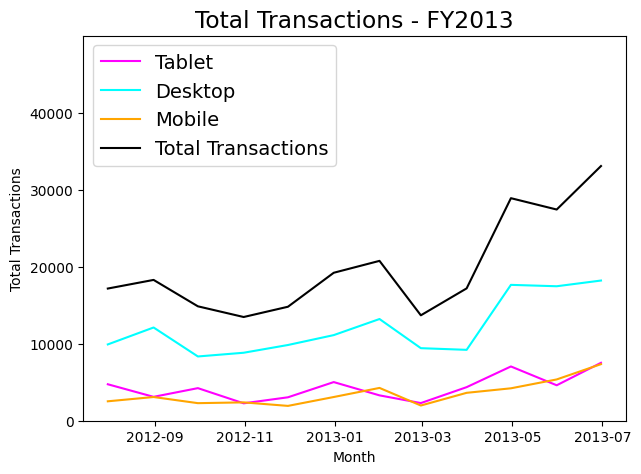

In [20]:
# Total monthly transactions line plot by month throughout FY2013.

monthly_tablet = tablet.resample('M')['transactions'].sum()
monthly_desktop = desktop.resample('M')['transactions'].sum()
monthly_mobile = mobile.resample('M')['transactions'].sum()
monthly_total = data_qtycorrect.resample('M')['transactions'].sum()

# Plotting the monthly totals on a line graph in different colors
plt.figure(figsize=(7, 5))

plt.plot(monthly_tablet.index, monthly_tablet, color='magenta', label='Tablet')
plt.plot(monthly_desktop.index, monthly_desktop, color='cyan', label='Desktop')
plt.plot(monthly_mobile.index, monthly_mobile, color='orange', label='Mobile')
plt.plot(monthly_total.index, monthly_total, color='black', label='Total Transactions')

# Title, labels, and legend
plt.rc('font', size=14)
plt.title('Total Transactions - FY2013')
plt.xlabel('Month')
plt.ylabel('Total Transactions')
plt.ylim(0, 50000)
plt.yticks(range(0, 50000, 10000))
plt.legend()

# Save
plt.savefig(PATH + 'monthly_transactions_total.png', transparent=True, dpi=300) 

# Show the plot
plt.show()

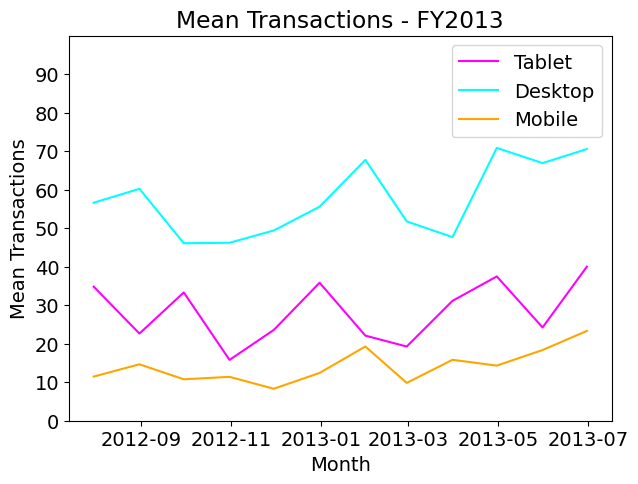

In [21]:
# Mean monthly transactions line plot by month throughout FY2013.

monthly_mean_tablet = tablet.resample('M')['transactions'].mean()
monthly_mean_desktop = desktop.resample('M')['transactions'].mean()
monthly_mean_mobile = mobile.resample('M')['transactions'].mean()

# Plotting the monthly means on a line graph in different colors
plt.figure(figsize=(7, 5))

plt.plot(monthly_mean_tablet.index, monthly_mean_tablet, color='magenta', label='Tablet')
plt.plot(monthly_mean_desktop.index, monthly_mean_desktop, color='cyan', label='Desktop')
plt.plot(monthly_mean_mobile.index, monthly_mean_mobile, color='orange', label='Mobile')

# Title, labels, and legend
plt.rc('font', size=14)
plt.title('Mean Transactions - FY2013')
plt.xlabel('Month')
plt.ylabel('Mean Transactions')
plt.ylim(0, 100)
plt.yticks(range(0, 100, 10))
plt.legend()

# Save
plt.savefig(PATH + 'monthly_transactions_mean.png', transparent=True, dpi=300) 

# Show the plot
plt.show()

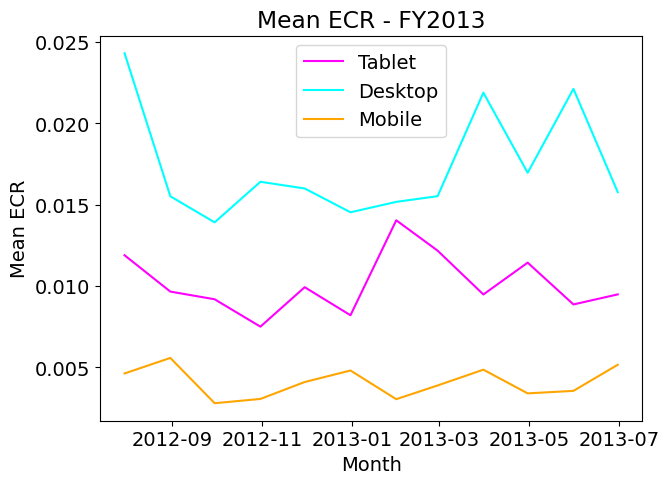

In [22]:
# Mean monthly ECR values line plot by month throughout FY2013.

monthly_mean_tablet = tablet.resample('M')['ECR'].mean()
monthly_mean_desktop = desktop.resample('M')['ECR'].mean()
monthly_mean_mobile = mobile.resample('M')['ECR'].mean()

# Plotting the monthly means on a line graph in different colors
plt.figure(figsize=(7, 5))

plt.plot(monthly_mean_tablet.index, monthly_mean_tablet, color='magenta', label='Tablet')
plt.plot(monthly_mean_desktop.index, monthly_mean_desktop, color='cyan', label='Desktop')
plt.plot(monthly_mean_mobile.index, monthly_mean_mobile, color='orange', label='Mobile')

# Title, labels, and legend
plt.title('Mean ECR - FY2013')
plt.xlabel('Month')
plt.ylabel('Mean ECR')
plt.legend()

# Save
plt.savefig(PATH + 'monthly_ECR_mean.png', transparent=True, dpi=300) 

# Show the plot
plt.show()

NameError: name 'monthly_mean_total' is not defined

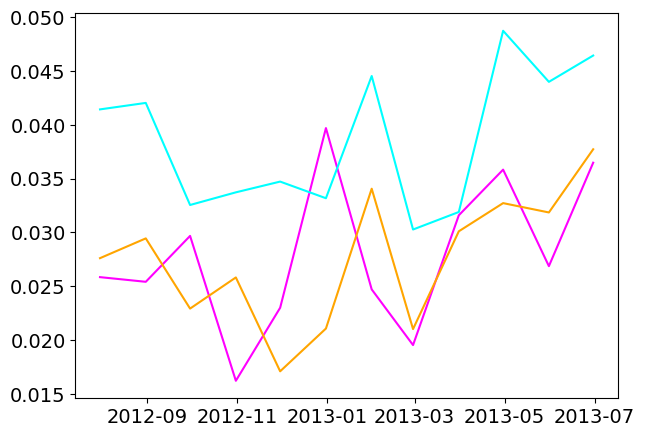

In [23]:
# Mean monthly normalized sessions line plot by month throughout FY2013.

monthly_mean_tablet = tablet.resample('M')['Norm_sessions'].mean()
monthly_mean_desktop = desktop.resample('M')['Norm_sessions'].mean()
monthly_mean_mobile = mobile.resample('M')['Norm_sessions'].mean()

# Plotting the monthly means on a line graph in different colors
plt.figure(figsize=(7, 5))

plt.plot(monthly_mean_tablet.index, monthly_mean_tablet, color='magenta', label='Tablet')
plt.plot(monthly_mean_desktop.index, monthly_mean_desktop, color='cyan', label='Desktop')
plt.plot(monthly_mean_mobile.index, monthly_mean_mobile, color='orange', label='Mobile')
plt.plot(monthly_mean_total.index, monthly_mean_total, color='black', label='Total Sales')

# Title, labels, and legend
plt.title('Mean Sessions (Normalized) - FY2013')
plt.xlabel('Month')
plt.ylabel('Mean Sessions (Normalized)')
plt.ylim(0, 0.08)
plt.legend()

# Save
plt.savefig(PATH + 'monthly_sessions_mean.png', transparent=True, dpi=300) 

# Show the plot
plt.show()

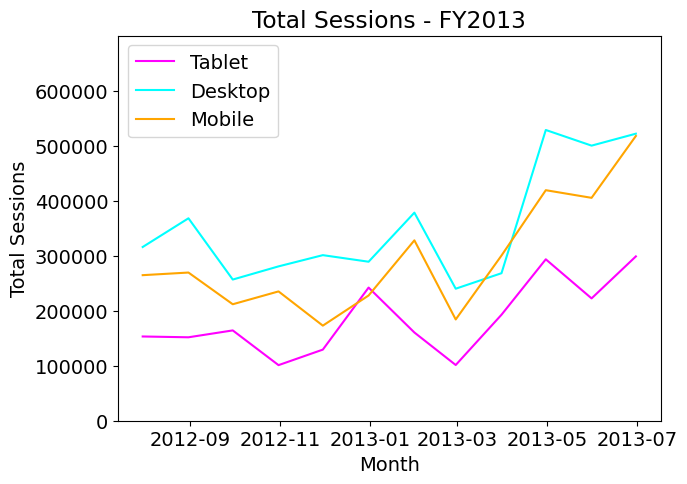

In [24]:
# Total monthly sessions line plot by month throughout FY2013.

monthly_tablet = tablet.resample('M')['sessions'].sum()
monthly_desktop = desktop.resample('M')['sessions'].sum()
monthly_mobile = mobile.resample('M')['sessions'].sum()
#monthly_total = data_qtycorrect.resample('M')['sessions'].sum() 
# Monthly total was too big to show

plt.figure(figsize=(7, 5))

plt.plot(monthly_tablet.index, monthly_tablet, color='magenta', label='Tablet')
plt.plot(monthly_desktop.index, monthly_desktop, color='cyan', label='Desktop')
plt.plot(monthly_mobile.index, monthly_mobile, color='orange', label='Mobile')
#plt.plot(monthly_total.index, monthly_total, color='black', label='Total Sessions')

plt.title('Total Sessions - FY2013')
plt.xlabel('Month')
plt.ylabel('Total Sessions')
plt.ylim(0, 700000)
plt.yticks(range(0, 700000, 100000))
plt.legend()

plt.savefig(PATH + 'monthly_sessions_total.png', transparent=True, dpi=300) 

plt.show()

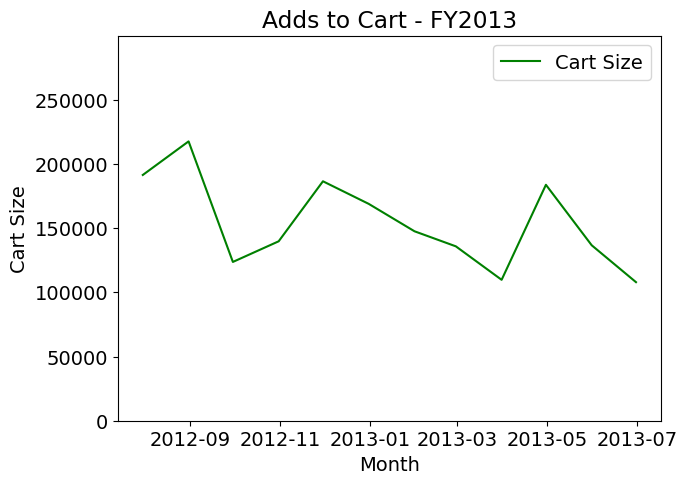

In [25]:
# Total monthly cart activity line plot by month throughout FY2013.

monthly_mean_adds = adds.resample('M')['addsToCart'].sum()

plt.figure(figsize=(7, 5))

plt.plot(monthly_mean_adds.index, monthly_mean_adds, color='green', label='Cart Size')

plt.title('Adds to Cart - FY2013')
plt.xlabel('Month')
plt.ylabel('Cart Size')
plt.ylim(0, 300000)
plt.yticks(range(0, 300000, 50000))
plt.legend()

plt.savefig(PATH + 'monthly_adds_total.png', transparent=True, dpi=300) 

plt.show()

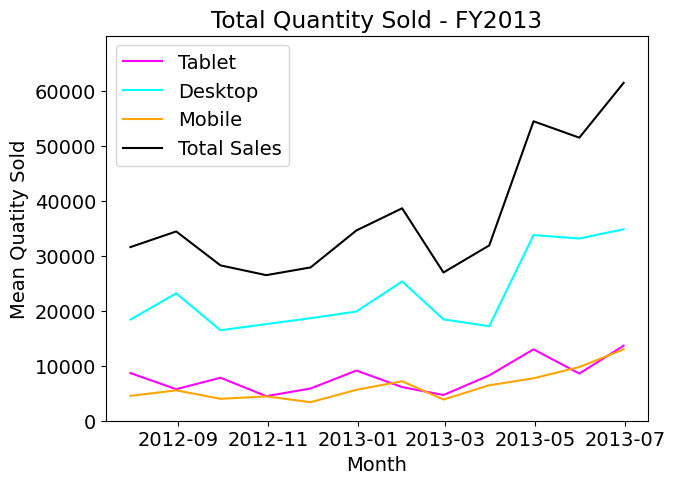

In [26]:
# Total monthly transactions line plot by month throughout FY2013.

monthly_tablet = tablet.resample('M')['QTY'].sum()
monthly_desktop = desktop.resample('M')['QTY'].sum()
monthly_mobile = mobile.resample('M')['QTY'].sum()
monthly_total = data_qtycorrect.resample('M')['QTY'].sum()

plt.figure(figsize=(7, 5))

plt.plot(monthly_tablet.index, monthly_tablet, color='magenta', label='Tablet')
plt.plot(monthly_desktop.index, monthly_desktop, color='cyan', label='Desktop')
plt.plot(monthly_mobile.index, monthly_mobile, color='orange', label='Mobile')
plt.plot(monthly_total.index, monthly_total, color='black', label='Total Sales')

#plt.rc('font', size=14)
plt.title('Total Quantity Sold - FY2013')
plt.xlabel('Month')
plt.ylabel('Mean Quatity Sold')
plt.ylim(0, 70000)
plt.yticks(range(0, 70000, 10000))
plt.legend()

plt.savefig(PATH + 'monthly_QTY_total.png', transparent=True, dpi=300) 

plt.show()